In [3]:
import sys
import pprint
pprint.pprint(sys.path)

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pylab as pl
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
matplotlib.style.use('ggplot')
%pylab inline
%matplotlib inline


['',
 '/home/inmediaref/anaconda3/lib/python35.zip',
 '/home/inmediaref/anaconda3/lib/python3.5',
 '/home/inmediaref/anaconda3/lib/python3.5/plat-linux',
 '/home/inmediaref/anaconda3/lib/python3.5/lib-dynload',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages/Sphinx-1.3.5-py3.5.egg',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages/setuptools-20.3-py3.5.egg',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages',
 '/home/inmediaref/anaconda3/lib/python3.5/site-packages/IPython/extensions',
 '/home/inmediaref/.ipython']
Populating the interactive namespace from numpy and matplotlib


In [4]:
mib_fb = pd.read_csv('https://raw.githubusercontent.com/marcogoldin/data_science/master/mibact_facebook/mibact_facebook_feb_mag_2016.csv',sep=';')

In [5]:
mib_fb.describe()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
count,213.000000,2.130000e+02,213.000000,213.000000,213.000000,213.00000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,107.000000,1.459499e+09,726.413146,731.746479,20.760563,20.56338,15.859155,4.704225,261.544601,16.751174,1025.272300
std,61.631972,2.162119e+06,591.751452,595.717572,26.140115,25.92409,19.680200,8.234295,368.887138,28.384640,949.021259
min,1.000000,1.455703e+09,17.000000,17.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,54.000000,1.457628e+09,283.000000,287.000000,5.000000,5.00000,4.000000,0.000000,27.000000,1.000000,353.000000
50%,107.000000,1.459443e+09,613.000000,616.000000,13.000000,13.00000,10.000000,2.000000,165.000000,7.000000,803.000000
75%,160.000000,1.461265e+09,997.000000,1009.000000,27.000000,27.00000,21.000000,6.000000,326.000000,19.000000,1397.000000
max,213.000000,1.463473e+09,2980.000000,2997.000000,201.000000,200.00000,147.000000,61.000000,2488.000000,206.000000,5638.000000


In [6]:
mib_fb.corr()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,1.000000,-0.999127,0.033839,0.035381,0.016952,0.017501,0.027277,-0.010094,0.107086,0.051667,0.064748
post_published_unix,-0.999127,1.000000,-0.033097,-0.034650,-0.020441,-0.020955,-0.030516,0.006961,-0.109657,-0.053595,-0.065437
likes,0.033839,-0.033097,1.000000,0.999989,0.647661,0.647439,0.649203,0.486725,0.788388,0.596614,0.965517
likes_count_fb,0.035381,-0.034650,0.999989,1.000000,0.647592,0.647361,0.649048,0.486848,0.788916,0.596618,0.965714
comments_count_fb,0.016952,-0.020441,0.647661,0.647592,1.000000,0.999813,0.970484,0.828232,0.676019,0.822288,0.718518
comments_all,0.017501,-0.020955,0.647439,0.647361,0.999813,1.000000,0.971758,0.825777,0.675958,0.822015,0.718353
comments_base,0.027277,-0.030516,0.649203,0.649048,0.970484,0.971758,1.000000,0.669365,0.666178,0.829946,0.715117
comments_replies,-0.010094,0.006961,0.486725,0.486848,0.828232,0.825777,0.669365,1.000000,0.535940,0.604363,0.552446
shares,0.107086,-0.109657,0.788388,0.788916,0.676019,0.675958,0.666178,0.535940,1.000000,0.700899,0.919721
comment_likes,0.051667,-0.053595,0.596614,0.596618,0.822288,0.822015,0.829946,0.604363,0.700899,1.000000,0.696817


In [7]:
mib_fb.cov()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,3.798500e+03,-1.331393e+08,1.234118e+03,1.299028e+03,2.731132e+01,2.796226e+01,3.308491e+01,-5.122642,2.434627e+03,9.038679e+01,3.787094e+03
post_published_unix,-1.331393e+08,4.674757e+12,-4.234614e+07,-4.462929e+07,-1.155272e+06,-1.174546e+06,-1.298479e+06,123932.197582,-8.745977e+07,-3.289194e+06,-1.342697e+08
likes,1.234118e+03,-4.234614e+07,3.501698e+05,3.525130e+05,1.001831e+04,9.932120e+03,7.560478e+03,2371.641642,1.720968e+05,1.002111e+04,5.422198e+05
likes_count_fb,1.299028e+03,-4.462929e+07,3.525130e+05,3.548794e+05,1.008438e+04,9.997478e+03,7.609337e+03,2388.141642,1.733662e+05,1.008835e+04,5.459650e+05
comments_count_fb,2.731132e+01,-1.155272e+06,1.001831e+04,1.008438e+04,6.833056e+02,6.775318e+02,4.992586e+02,178.273186,6.518688e+03,6.101194e+02,1.782465e+04
comments_all,2.796226e+01,-1.174546e+06,9.932120e+03,9.997478e+03,6.775318e+02,6.720585e+02,4.957826e+02,176.275910,6.464229e+03,6.048767e+02,1.767328e+04
comments_base,3.308491e+01,-1.298479e+06,7.560478e+03,7.609337e+03,4.992586e+02,4.957826e+02,3.873103e+02,108.472296,4.836299e+03,4.636204e+02,1.335618e+04
comments_replies,-5.122642e+00,1.239322e+05,2.371642e+03,2.388142e+03,1.782732e+02,1.762759e+02,1.084723e+02,67.803614,1.627931e+03,1.412562e+02,4.317105e+03
shares,2.434627e+03,-8.745977e+07,1.720968e+05,1.733662e+05,6.518688e+03,6.464229e+03,4.836299e+03,1627.930707,1.360777e+05,7.338924e+03,3.219777e+05
comment_likes,9.038679e+01,-3.289194e+06,1.002111e+04,1.008835e+04,6.101194e+02,6.048767e+02,4.636204e+02,141.256245,7.338924e+03,8.056878e+02,1.877060e+04


In [8]:
mib_fb[['likes','shares']].corr()

,likes,shares
likes,1.000000,0.788388
shares,0.788388,1.000000


# ...occhei, partiamo...

=============================================================================================================

# - Parte 1

**Cerchiamo innanzitutto di capire la concentrazione dei valori e la distribuzione degli outliers**

- **Engagement**

In [9]:
engage = mib_fb['engagement']

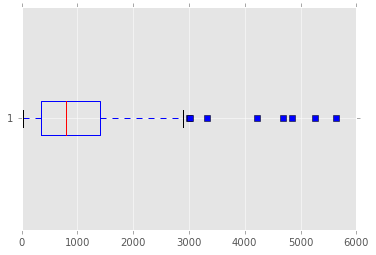

In [10]:
engage_boxplt = plt.boxplot(engage, 0, 'rs', 0)

**Il boxplot evidenzia un gran numero di outliers nei dati di engagement**

**E evidente che NON siamo in presenza di una "distribuzione normale"**

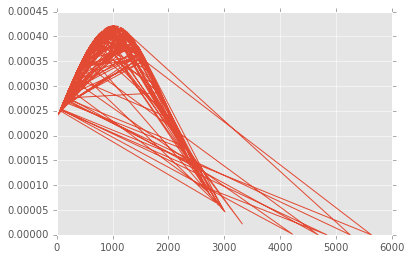

In [11]:
#Proviamo a rappresentare una gaussiana con i dati di engagement
mib_fb_media = np.mean(engage)
mib_fb_std = np.std(engage)
pdf = stats.norm.pdf(engage, mib_fb_media, mib_fb_std)
plt.plot(engage, pdf)

# O anche...

(array([ 82.,  54.,  46.,  12.,   9.,   5.,   0.,   1.,   2.,   2.]),
 array([   25. ,   586.3,  1147.6,  1708.9,  2270.2,  2831.5,  3392.8,
         3954.1,  4515.4,  5076.7,  5638. ]),
 <a list of 10 Patch objects>)

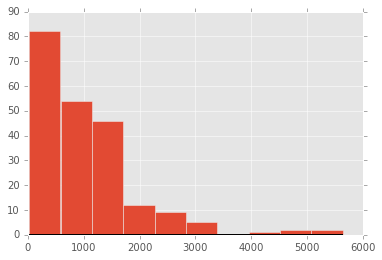

In [12]:
engage_norm = stats.norm.pdf(engage, np.mean(engage), np.std(engage))

pl.plot(engage, engage_norm, '-0')

pl.hist(engage)

**No, decisamente una distribuzione "non normale"**

In [13]:
engage.mean()

1025.2723004694835

In [14]:
engage.std()

949.0212589984502

In [15]:
engage.median()

803.0

# E normalizzando i dati con una trasformazione logaritmica?

(array([  3.,   9.,  15.,  12.,  17.,  32.,  47.,  53.,  19.,   6.]),
 array([ 3.21887582,  3.76071671,  4.30255759,  4.84439848,  5.38623936,
         5.92808025,  6.46992113,  7.01176202,  7.5536029 ,  8.09544379,
         8.63728467]),
 <a list of 10 Patch objects>)

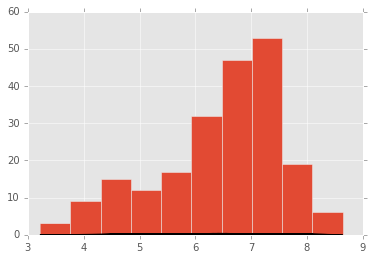

In [16]:
engage_log = np.log(mib_fb['engagement'])

engage_log_new = stats.norm.pdf(engage_log, np.mean(engage_log), np.std(engage_log))

pl.plot(engage_log, engage_log_new, '-0')

pl.hist(engage_log)

**Meglio, mal risultato è comunque caratterizzato da una asimmetria fortemente negativa.
E' la classica situazione in cui la distribuzione presenta pochi dati con forti scarti negativi bilanciati da molti dati con deboli scarti positivi.**

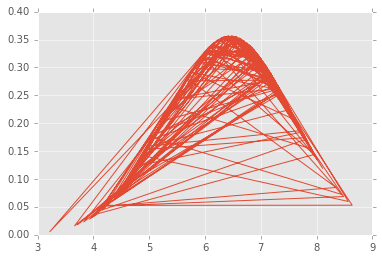

In [17]:

linea = stats.norm.pdf(engage_log, np.mean(engage_log), np.std(engage_log))
plt.plot(engage_log, linea)

# - Parte 2

In [18]:
colonne = mib_fb.columns
colonne

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

# Nuovo DataFrame con tipo di post, data e likes/engagement per capire se esistono possibili correlazioni

In [19]:
DataFrame(mib_fb,columns=['post_type','post_published','likes','shares','engagement','comments_all'])

,post_type,post_published,likes,shares,engagement,comments_all
0,photo,2016-05-17T08:14:39+0000,479,91,581,9
1,photo,2016-05-16T09:26:22+0000,961,0,978,10
2,photo,2016-05-16T07:54:03+0000,1465,651,2262,61
3,photo,2016-05-14T11:55:18+0000,86,55,153,4
4,photo,2016-05-14T07:03:01+0000,1330,442,1857,49
5,photo,2016-05-13T14:18:50+0000,1116,284,1452,23
6,photo,2016-05-13T07:33:05+0000,289,79,374,4
7,photo,2016-05-12T14:52:37+0000,2095,685,2860,34
8,photo,2016-05-12T13:55:50+0000,48,11,59,0
9,photo,2016-05-12T09:00:42+0000,337,74,432,12


In [20]:
mib_index = mib_fb.index
mib_index

RangeIndex(start=0, stop=213, step=1)

# Contiamo le tipologie di post più utilizzate

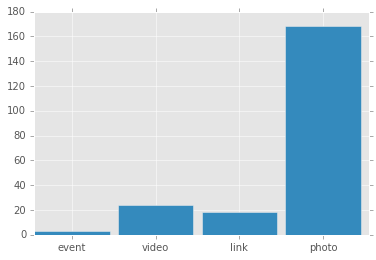

In [21]:
counter = Counter(mib_fb['post_type'])
mib_fb_ptype = counter.keys()
mib_fb_ptype_counts = counter.values()

# Plot histogram using matplotlib bar().
indexes = np.arange(len(mib_fb_ptype))
width = 0.9
plt.bar(indexes, mib_fb_ptype_counts, width)
plt.xticks(indexes + width * 0.5, mib_fb_ptype)
plt.show()



In [22]:
counter

Counter({'event': 3, 'link': 18, 'photo': 168, 'video': 24})

# - Selezioniamo le foto ['Photo']

In [23]:
mib_photo = mib_fb.loc[mib_fb['post_type']=='photo']
#mib_photo
mib_photo.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

In [24]:
mib_photo.describe()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
count,168.000000,1.680000e+02,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,105.559524,1.459554e+09,824.916667,831.083333,22.202381,21.988095,16.714286,5.273810,303.976190,18.452381,1169.333333
std,62.746396,2.205337e+06,603.264378,607.155352,25.508613,25.271694,17.817485,8.910535,395.120446,28.985193,984.054826
min,1.000000,1.455703e+09,41.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
25%,50.500000,1.457668e+09,384.500000,388.000000,7.000000,7.000000,6.000000,0.000000,75.500000,2.000000,507.750000
50%,104.000000,1.459590e+09,733.500000,742.000000,14.000000,14.000000,13.000000,2.000000,210.000000,9.000000,994.500000
75%,159.500000,1.461323e+09,1087.250000,1095.750000,29.250000,29.000000,21.250000,6.000000,344.750000,20.000000,1525.750000
max,213.000000,1.463473e+09,2980.000000,2997.000000,201.000000,200.000000,144.000000,61.000000,2488.000000,206.000000,5638.000000


In [25]:
#mib_photo.cov()

In [26]:
mib_photo.corr()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,1.000000,-0.999135,0.053500,0.055143,0.069447,0.070567,0.089366,0.021444,0.130604,0.091620,0.089749
post_published_unix,-0.999135,1.000000,-0.053371,-0.055029,-0.072850,-0.073935,-0.092364,-0.025000,-0.133333,-0.093643,-0.090912
likes,0.053500,-0.053371,1.000000,0.999989,0.677441,0.678327,0.729581,0.464974,0.779935,0.626370,0.962071
likes_count_fb,0.055143,-0.055029,0.999989,1.000000,0.677704,0.678584,0.729867,0.465132,0.780543,0.626628,0.962322
comments_count_fb,0.069447,-0.072850,0.677441,0.677704,1.000000,0.999773,0.972442,0.891022,0.722828,0.816639,0.755259
comments_all,0.070567,-0.073935,0.678327,0.678584,0.999773,1.000000,0.973536,0.889479,0.723871,0.816834,0.756233
comments_base,0.089366,-0.092364,0.729581,0.729867,0.972442,0.973536,1.000000,0.761505,0.764489,0.853961,0.804377
comments_replies,0.021444,-0.025000,0.464974,0.465132,0.891022,0.889479,0.761505,1.000000,0.524343,0.609093,0.536367
shares,0.130604,-0.133333,0.779935,0.780543,0.722828,0.723871,0.764489,0.524343,1.000000,0.732676,0.919825
comment_likes,0.091620,-0.093643,0.626370,0.626628,0.816639,0.816834,0.853961,0.609093,0.732676,1.000000,0.728607


# - Covarianza likes | shares nei 'foto-post' pubblicati

In [27]:
mib_fbphoto_likes = mib_photo['likes']
print(mib_fbphoto_likes.count(),"righe")

photolike_mean = mib_fbphoto_likes.mean()
print("media", photolike_mean)
photolike_median = mib_fbphoto_likes.median()
print("mediana", photolike_median)
photolike_std = mib_fbphoto_likes.std()
print("deviazione standard", photolike_std)

168 righe
media 824.9166666666666
mediana 733.5
deviazione standard 603.26437751755


In [28]:
mib_fbphoto_shares = mib_photo['shares']

In [29]:
mib_fbphoto_engag = mib_photo['engagement']

print(mib_fbphoto_engag.count(),"righe")

photoeng_mean = mib_fbphoto_engag.mean()
print("media =", photoeng_mean)
photoeng_median = mib_fbphoto_engag.median()
print("mediana =", photoeng_median)
photoeng_std = mib_fbphoto_engag.std()
print("deviazione standard =", photoeng_std)

168 righe
media = 1169.3333333333333
mediana = 994.5
deviazione standard = 984.054825809823


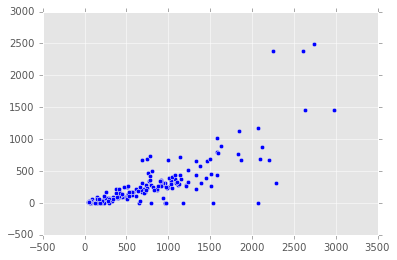

In [30]:
pl.scatter(mib_fbphoto_likes,mib_fbphoto_shares)

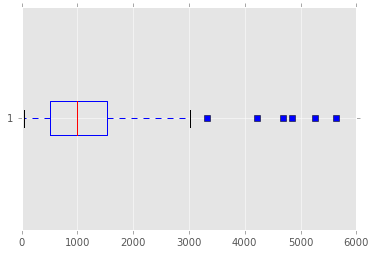

In [31]:
photoeng_boxplt = plt.boxplot(mib_fbphoto_engag, 0, 'rs', 0)

***Togliamo outliers, massimi e minimi e riduciamo il set a 132 foto-post:***

In [32]:
mib_photo_eng_norm = mib_photo.loc[mib_photo['engagement'] >= 185]
mib_photo_eng_norm2 = mib_photo_eng_norm.loc[mib_photo_eng_norm['engagement'] <= 2153  ]
print(mib_photo_eng_norm2.count())

﻿ord                   132
post_type              132
by                     132
post_message           132
picture                132
link                   132
link_domain            132
post_published         132
post_published_unix    132
post_published_sql     132
likes                  132
likes_count_fb         132
comments_count_fb      132
comments_all           132
comments_base          132
comments_replies       132
shares                 132
comment_likes          132
engagement             132
post_id                132
post_link              132
dtype: int64


In [33]:
mib_photo_eng_norm2.describe()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
count,132.000000,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,102.727273,1.459651e+09,730.833333,736.507576,19.015152,18.825758,14.136364,4.689394,223.878788,13.840909,987.378788
std,60.511319,2.123158e+06,358.660276,360.984204,16.459520,16.238441,10.387730,7.492625,168.399200,15.810823,492.857977
min,1.000000,1.455703e+09,68.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000
25%,47.500000,1.457910e+09,425.000000,429.500000,8.000000,8.000000,7.000000,1.000000,86.000000,3.000000,578.000000
50%,102.500000,1.459715e+09,716.500000,722.000000,14.000000,14.000000,12.000000,2.000000,207.500000,9.000000,951.500000
75%,154.500000,1.461346e+09,990.000000,995.250000,27.000000,27.000000,20.250000,6.000000,314.500000,19.000000,1356.750000
max,213.000000,1.463473e+09,1588.000000,1594.000000,125.000000,121.000000,60.000000,61.000000,743.000000,84.000000,2073.000000


**ottenendo così un set senza normalizzato senza outliers**

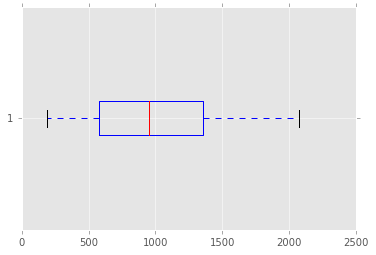

In [34]:
mib_photo_norm_engagement = mib_photo_eng_norm2['engagement']
mib_photo_norm_engagement
mib_photo_norm_boxplt = plt.boxplot(mib_photo_norm_engagement, 0, 'rs', 0)


- **Esportiamo il nuovo dataframe in un file csv**

In [35]:
mib_photo_eng_norm2.to_csv('photo_post_norm.csv')

- **Vediamo i valori di covarianza**

In [56]:
mib_photo_eng_norm2.cov()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,3.661620e+03,-1.283539e+08,-3.774046e+02,-3.187384e+02,17.011797,21.723109,6.968772,14.754337,1.429203e+03,-10.028452,1.063493e+03
post_published_unix,-1.283539e+08,4.507798e+12,1.493925e+07,1.287176e+07,-734626.679736,-898177.034178,-316877.705413,-581299.328765,-5.090270e+07,222086.293720,-3.663954e+07
likes,-3.774046e+02,1.493925e+07,1.286372e+05,1.294667e+05,2675.666667,2656.802799,1943.633588,713.169211,3.622887e+04,1821.034351,1.693439e+05
likes_count_fb,-3.187384e+02,1.287176e+07,1.294667e+05,1.303096e+05,2695.809045,2676.768506,1958.189799,718.578707,3.654773e+04,1832.035566,1.705232e+05
comments_count_fb,1.701180e+01,-7.346267e+05,2.675667e+03,2.695809e+03,270.915799,267.147698,159.486468,107.661231,1.085666e+03,168.384108,4.196864e+03
comments_all,2.172311e+01,-8.981770e+05,2.656803e+03,2.676769e+03,267.147698,263.686965,157.726232,105.960733,1.073322e+03,166.544587,4.160357e+03
comments_base,6.968772e+00,-3.168777e+05,1.943634e+03,1.958190e+03,159.486468,157.726232,107.904927,49.821305,6.989938e+02,122.594379,2.922948e+03
comments_replies,1.475434e+01,-5.812993e+05,7.131692e+02,7.185787e+02,107.661231,105.960733,49.821305,56.139429,3.743285e+02,43.950208,1.237409e+03
shares,1.429203e+03,-5.090270e+07,3.622887e+04,3.654773e+04,1085.665973,1073.322230,698.993754,374.328476,2.835829e+04,753.339348,6.641382e+04
comment_likes,-1.002845e+01,2.220863e+05,1.821034e+03,1.832036e+03,168.384108,166.544587,122.594379,43.950208,7.533393e+02,249.982130,2.990900e+03


- **Vediamo i coefficienti di correlazione**

In [36]:
mib_photo_eng_norm2.corr()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,1.000000,-0.999057,-0.017390,-0.014592,0.017080,0.022108,0.011087,0.032542,0.140255,-0.010482,0.035660
post_published_unix,-0.999057,1.000000,0.019618,0.016795,-0.021022,-0.026052,-0.014368,-0.036541,-0.142370,0.006616,-0.035014
likes,-0.017390,0.019618,1.000000,0.999969,0.453243,0.456175,0.521688,0.265384,0.599835,0.321130,0.957998
likes_count_fb,-0.014592,0.016795,0.999969,1.000000,0.453716,0.456645,0.522211,0.265676,0.601218,0.320990,0.958459
comments_count_fb,0.017080,-0.021022,0.453243,0.453716,1.000000,0.999516,0.932795,0.872988,0.391687,0.647038,0.517352
comments_all,0.022108,-0.026052,0.456175,0.456645,0.999516,1.000000,0.935059,0.870897,0.392506,0.648682,0.519834
comments_base,0.011087,-0.014368,0.521688,0.522211,0.932795,0.935059,1.000000,0.640119,0.399588,0.746441,0.570924
comments_replies,0.032542,-0.036541,0.265384,0.265676,0.872988,0.870897,0.640119,1.000000,0.296674,0.370999,0.335087
shares,0.140255,-0.142370,0.599835,0.601218,0.391687,0.392506,0.399588,0.296674,1.000000,0.282941,0.800197
comment_likes,-0.010482,0.006616,0.321130,0.320990,0.647038,0.648682,0.746441,0.370999,0.282941,1.000000,0.383818


In [37]:
mib_photo_eng_norm2.columns

Index(['﻿ord', 'post_type', 'by', 'post_message', 'picture', 'link',
       'link_domain', 'post_published', 'post_published_unix',
       'post_published_sql', 'likes', 'likes_count_fb', 'comments_count_fb',
       'comments_all', 'comments_base', 'comments_replies', 'shares',
       'comment_likes', 'engagement', 'post_id', 'post_link'],
      dtype='object')

- **l coefficiente di correlazione tra 'likes' e 'shares' è 0.599835 **
- ** I due valori non sono correlati, come si può notare dal grafico**

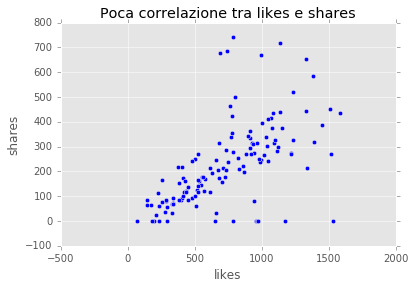

In [55]:
x_norm2 = mib_photo_eng_norm2['likes']
y_norm2 = mib_photo_eng_norm2['shares']
pl.scatter(x_norm2,y_norm2)

pylab.xlabel('likes')
pylab.ylabel('shares')
pylab.title('Poca correlazione tra likes e shares')


# NPL con NLTK

In [39]:
import nltk
import nltk.data
#nltk.download()

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
tokenizer = nltk.data.load("tokenizers/punkt/italian.pickle")
#stopwords.fileids()

text = str(mib_photo['post_message'])
#text
stop_words = set(stopwords.words("italian"))
testo2 = word_tokenize(text)

In [40]:
#stop_words
#stopwords.fileids()

In [41]:
tokenizer

In [42]:
testo_filtrato = [w for w in testo2 if not w in stop_words]
testo_filtrato_clean = [w for w in testo_filtrato if w != stop_words]
#testo_filtrato_clean


In [43]:
import csv

csvfile = "mib_photo_words.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in testo_filtrato_clean:
        writer.writerow([val])

# - Selezioniamo i link

In [44]:
mib_link = mib_fb.loc[mib_fb['post_type']=='link']
#mib_link

In [45]:
mib_link.describe()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
count,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,135.722222,1.458478e+09,369.500000,372.111111,10.500000,10.388889,7.388889,3.000000,117.833333,4.888889,502.611111
std,53.593026,1.869744e+06,431.639044,435.462147,12.006126,11.798000,7.437100,4.994114,209.830254,7.323523,642.645190
min,15.000000,1.455721e+09,17.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,108.250000,1.457374e+09,98.250000,100.500000,2.500000,2.500000,2.250000,0.000000,0.000000,0.000000,137.000000
50%,145.000000,1.458094e+09,272.500000,275.000000,5.500000,5.500000,5.500000,0.000000,28.500000,1.000000,347.000000
75%,170.000000,1.459441e+09,358.500000,361.000000,15.000000,15.000000,8.750000,4.000000,168.500000,6.500000,469.250000
max,212.000000,1.462794e+09,1846.000000,1864.000000,42.000000,41.000000,28.000000,14.000000,843.000000,23.000000,2745.000000


In [46]:
mib_link.cov()

,﻿ord,post_published_unix,likes,likes_count_fb,comments_count_fb,comments_all,comments_base,comments_replies,shares,comment_likes,engagement
﻿ord,2.872212e+03,-1.001216e+08,-1.926324e+03,-1.917203e+03,-2.475588e+02,-2.427092e+02,-1.077092e+02,-1.350000e+02,3.005980e+02,-4.667974e+01,-1.915114e+03
post_published_unix,-1.001216e+08,3.495943e+12,6.041970e+07,5.999484e+07,8.512554e+06,8.359431e+06,3.715054e+06,4.644377e+06,-1.472376e+07,1.773040e+06,5.582841e+07
likes,-1.926324e+03,6.041970e+07,1.863123e+05,1.879609e+05,3.826853e+03,3.735618e+03,2.590971e+03,1.144647e+03,8.428103e+04,1.245353e+03,2.755743e+05
likes_count_fb,-1.917203e+03,5.999484e+07,1.879609e+05,1.896273e+05,3.862059e+03,3.769837e+03,2.613719e+03,1.156118e+03,8.503920e+04,1.258248e+03,2.780282e+05
comments_count_fb,-2.475588e+02,8.512554e+06,3.826853e+03,3.862059e+03,1.441471e+02,1.416176e+02,8.608824e+01,5.552941e+01,1.577441e+03,6.682353e+01,5.612735e+03
comments_all,-2.427092e+02,8.359431e+06,3.735618e+03,3.769837e+03,1.416176e+02,1.391928e+02,8.478105e+01,5.441176e+01,1.528775e+03,6.645752e+01,5.470042e+03
comments_base,-1.077092e+02,3.715054e+06,2.590971e+03,2.613719e+03,8.608824e+01,8.478105e+01,5.531046e+01,2.947059e+01,1.045598e+03,4.063399e+01,3.761984e+03
comments_replies,-1.350000e+02,4.644377e+06,1.144647e+03,1.156118e+03,5.552941e+01,5.441176e+01,2.947059e+01,2.494118e+01,4.831765e+02,2.582353e+01,1.708059e+03
shares,3.005980e+02,-1.472376e+07,8.428103e+04,8.503920e+04,1.577441e+03,1.528775e+03,1.045598e+03,4.831765e+02,4.402874e+04,3.722745e+02,1.302108e+05
comment_likes,-4.667974e+01,1.773040e+06,1.245353e+03,1.258248e+03,6.682353e+01,6.645752e+01,4.063399e+01,2.582353e+01,3.722745e+02,5.363399e+01,1.737719e+03


=====================================================================================================================

# - Commenti

In [47]:
# https://raw.githubusercontent.com/marcogoldin/data_science/master/mibact_facebook/mibact_facebook_feb_mag_2016_comments.csv

In [48]:
mib_comm = pd.read_csv('https://raw.githubusercontent.com/marcogoldin/data_science/master/mibact_facebook/mibact_facebook_feb_mag_2016_comments.csv',sep=';')

In [49]:
mib_comm.describe()

,is_reply,comment_like_count
count,4380.000000,4380.000000
mean,0.228767,0.963699
std,0.420087,2.481042
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,67.000000


In [50]:
mib_comm.columns

Index(['﻿position', 'post_id', 'post_by', 'post_text', 'post_published',
       'comment_id', 'comment_by', 'is_reply', 'comment_message',
       'comment_published', 'comment_like_count'],
      dtype='object')

In [51]:
mib_comm_repl = DataFrame(mib_comm,columns=['post_text','comment_message','comment_id'])
mib_comm_repl.count()
#mib_comm_repl

post_text          4380
comment_message    4249
comment_id         4380
dtype: int64

# intervallo... 
# camperisti

In [52]:
pd.options.display.max_colwidth = 500
mib_comm_camper = mib_comm_repl[mib_comm_repl['comment_id']=='10154223947508711_10154224070838711']
mib_comm_camper

,post_text,comment_message,comment_id
25,#Buongiorno dall_antica città di Elea-Velia #Salerno L’antica città di Elea_ che deriva il suo nome dalla sorgente locale Hyele_ fu fondata intorno al 540 a.C. da un gruppo di esuli provenienti dalla città greca di Focea_ nell’attuale Turchia_ occupata dai Persiani. La città_ nota nel V sec. soprattutto per le figure di Parmenide e Zenone_ fondatori della scuola filosofica eleatica_ raggiunge un periodo di grande sviluppo in età ellenistica e in gran parte dell’età romana (fine IV a.C. – V s...,"Grazie a voi , che avete pubblicato questo post qualche mese fa, ho potuto conoscere questo sito molto bello ed interessante che non conoscevo ed ho organizzato un raduno di camperisti, il 25 aprile eravamo li in 48 persone .",10154223947508711_10154224070838711
